# Loading Data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat

In [2]:
mat = loadmat('Data/ex7data2.mat')
X = mat['X']

# Unlabled Data 

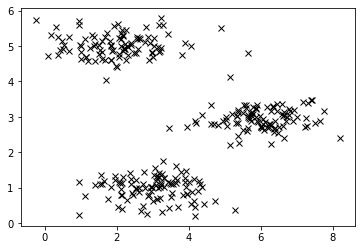

In [3]:
plt.plot(X[:, 0], X[:, 1], 'kx')
plt.show()

# Finding Closest Centroid for the Data

In [4]:
def findClosestCentroids(X, centroids):
    
    m = X.shape[0]
    idx = np.zeros(m)
    
    for j in range(m):
        dist = np.linalg.norm(X[j] - centroids, axis=1)
        idx[j] = np.argmin(dist)
    return idx

In [5]:
# Select an initial set of centroids
K = 3
initial_centroids = np.array([[3,3],[6,2],[8,5]])
idx = findClosestCentroids(X, initial_centroids)
print("Closest centroids for the first 3 examples:\n",idx[0:3])

Closest centroids for the first 3 examples:
 [0. 2. 1.]


# Compute Centroid For the Clusters 

In [6]:
def computeCentroids(X, idx, n_centroids, n_dim=2):
    
    new_centroid = np.zeros([n_centroids, n_dim])
    for i in range(n_centroids):
        new_centroid[i] = np.mean(X[idx==i], axis=0)
    return new_centroid

computeCentroids(X, idx, 3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

# Plotting k-Mean 

In [7]:
def plot_kmean(X, centroids):
    
    idx = findClosestCentroids(X, centroids)
    
    fig, ax = plt.subplots()
    for i in range(3):
        temp = X[idx==i]
        ax.scatter(temp[:, 0], temp[:, 1], marker='x')
    plt.scatter(centroids[:, 0], centroids[:, 1], 
                s=100, marker='*', color='k')
    plt.show()

### For Given Initialization

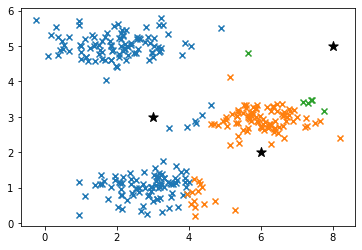

In [8]:
plot_kmean(X, initial_centroids)

### For Other Initialization

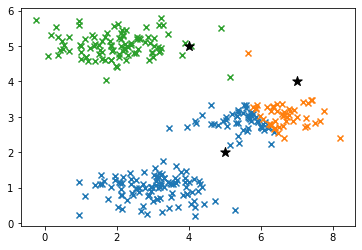

In [9]:
np.random.seed(7)
random_init = np.random.randint(1, 8, (3, 2))
plot_kmean(X, random_init)

# k-Mean Iteration 

In [10]:
def kMean(X, initial_centroids, n_cluster, n_iter, n_dim=2):
    
    centriod_hist = []
    current_centroids = initial_centroids

    for i in range(n_iter):
        centriod_hist.append(current_centroids)
        idxs = findClosestCentroids(X, current_centroids)
        current_centroids = computeCentroids(X, idxs, n_cluster, n_dim)
        
    return idxs, centriod_hist

In [11]:
kMean(X, initial_centroids, 3, 5)

(array([0., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 

# Plotting Centroids and Clusters 

In [12]:
def plot_centroids(X, initial_centroids, n_centroids, n_iter, n_dim=2):
    
    idx = kMean(X, initial_centroids, n_centroids, n_iter, n_dim)[0]
    cent_hist = kMean(X, initial_centroids, n_centroids, n_iter, n_dim)[1]

    fig, ax = plt.subplots()
    for i in range(3):
        temp = X[idx==i]
        ax.scatter(temp[:, 0], temp[:, 1], marker='x')
        
    cent_x, cent_y = [], []
    for cent in cent_hist:
        cent_x.append(cent[:,0])
        cent_y.append(cent[:,1])

    for x in range(len(cent_x[0])):
        ax.plot(cent_x, cent_y, 'k*:', markersize=10)
        
    plt.show()   

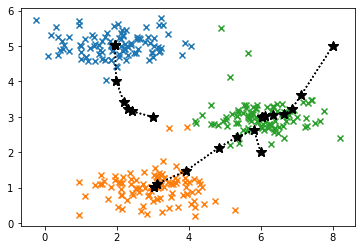

In [13]:
plot_centroids(X, initial_centroids, 3, 10)

# Random Initialization 

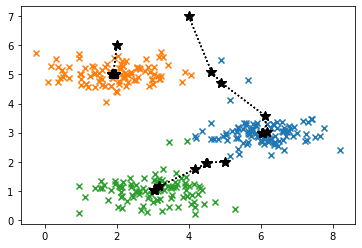

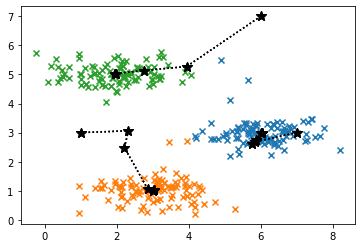

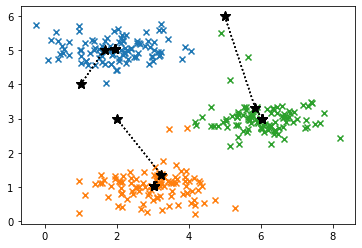

In [14]:
np.random.seed(777)
for _ in range(3):
    random_init = np.random.randint(1, 8, (3, 2))
    plot_centroids(X, random_init, 3, 10)

# Image Compression with k-Mean 

In [15]:
from sklearn.cluster import KMeans

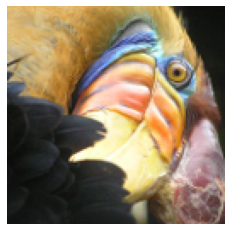

In [16]:
mat2 = loadmat('Data/bird_small.mat')
A = mat2['A']

plt.imshow(A)
plt.axis('off')
plt.show()

In [17]:
A2 = A / 255
A2 = A2.reshape(128*128, 3)
A2.shape

(16384, 3)

In [18]:
kmeans = KMeans(n_clusters=16)
kmeans.fit(A2)
clusters = kmeans.predict(A2)

In [19]:
A3 = kmeans.cluster_centers_[clusters]
A4 = A3.reshape(A.shape)

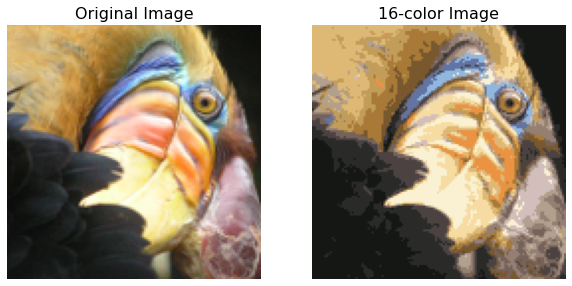

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(A)
ax[0].axis('off')
ax[0].set_title('Original Image', size=16)

ax[1].imshow(A4)
ax[1].axis('off')
ax[1].set_title('16-color Image', size=16)
plt.show()